### Cluster Analysis of Brands
   - **Use clustering techniques** to group brands based on their engagement patterns and demographics of followers. This can help in identifying niche markets and tailoring content accordingly.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load the data
df = pd.read_csv('../clean_data/data_completed_model.csv')

In [55]:
# Aggregate the data by company
aggregated_data = df.groupby('company').agg({
    'followers': 'mean',
    'likes': 'mean',
    'comments': 'mean',
    'pictures': 'mean',
    'videos': 'mean'
}).reset_index()

In [56]:
# Extract the features for clustering
X = aggregated_data[['followers', 'likes', 'comments', 'pictures', 'videos']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Range of K to try
K_range = range(2, 7)

/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

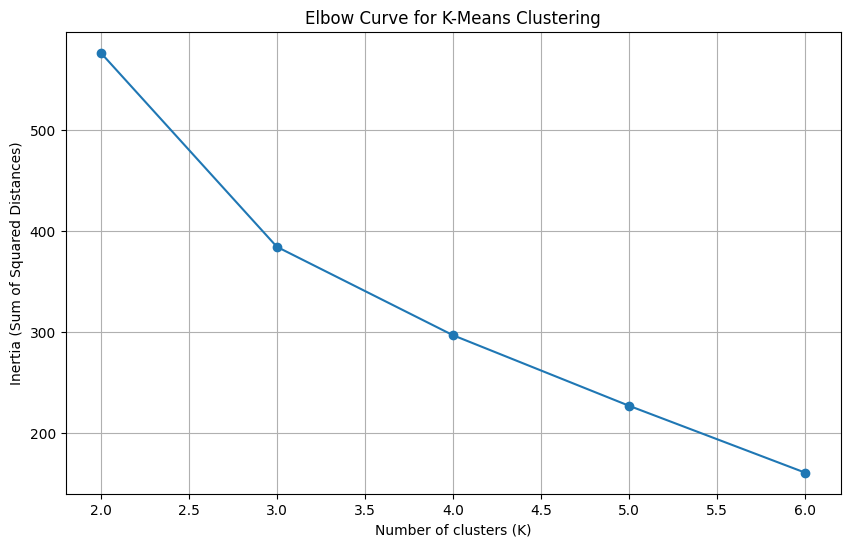

In [58]:
# List to collect the sum of squared distances for each K
inertias = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [59]:
# Set new range of K
K_range = range(2, 5)

In [60]:
def plot_clusters(principal_components, cluster_labels, K, title):
    # Define a color palette
    colors = plt.cm.tab10(np.linspace(0, 1, 10))

    # Create a new figure for the clusters
    plt.figure(figsize=(5, 5))
    for i in range(K):
        # Select indices of data points in the current cluster
        idx = cluster_labels == i
        # Scatter plot for each cluster
        plt.scatter(principal_components[idx, 0], principal_components[idx, 1], color=colors[i], label=f'Cluster {i}', alpha=0.7)
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title="Clusters")
    plt.show()

In [61]:
def plot_cluster_boxplots(df, cluster_label_column, K):
    num_features = ['followers', 'pictures', 'videos', 'comments', 'likes']
    
    # Loop through each cluster number and create boxplots
    for cluster in range(K):
        # Filter data for the current cluster using the dynamic cluster column name
        cluster_data = df[df[cluster_label_column] == cluster]

        # Setting up the subplot for each numerical feature
        fig, axes = plt.subplots(nrows=1, ncols=len(num_features), figsize=(20, 4))
        
        for i, feature in enumerate(num_features):
            # Check if the column exists in the DataFrame to avoid KeyError
            if feature in cluster_data.columns:
                axes[i].boxplot(cluster_data[feature], vert=True, notch=True, patch_artist=True)
                axes[i].set_title(f'{feature} Distribution')
                axes[i].set_xlabel('')
        
        plt.suptitle(f'Boxplots of Engagement Metrics for Cluster {cluster} with K = {K}', fontsize=16)
        plt.tight_layout(pad=2)
        plt.show()


/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


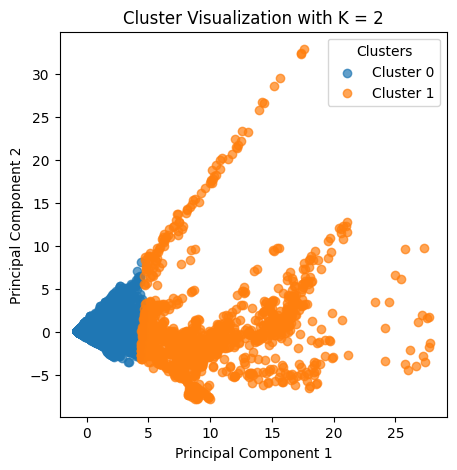

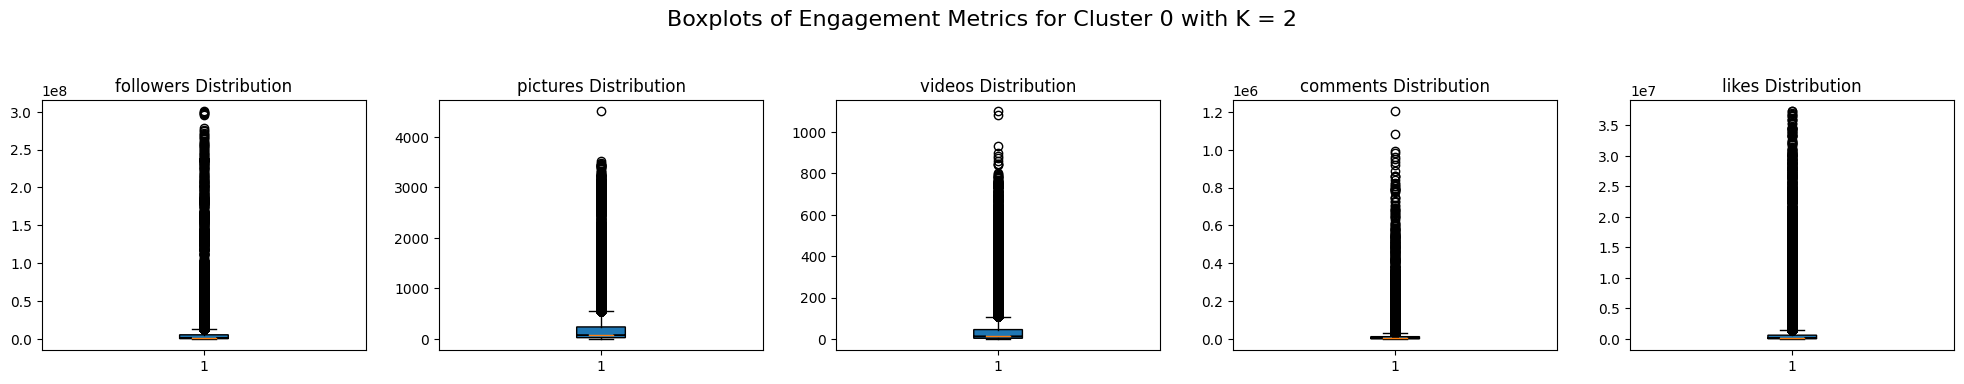

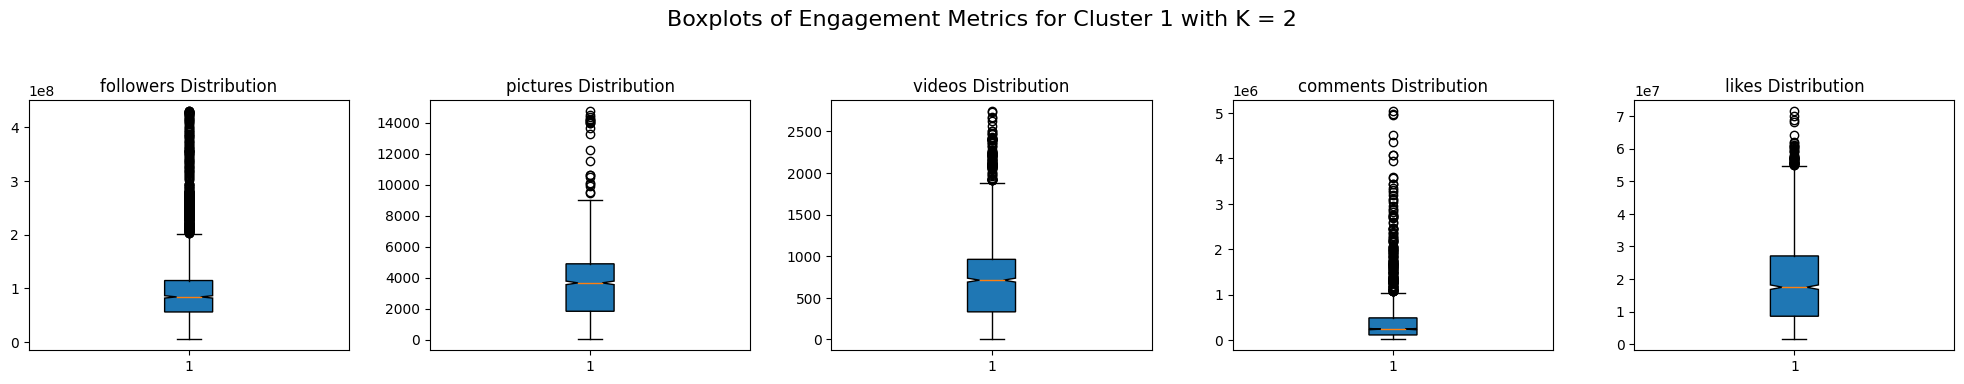

/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


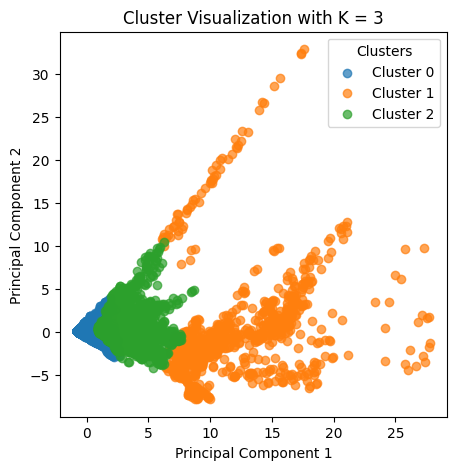

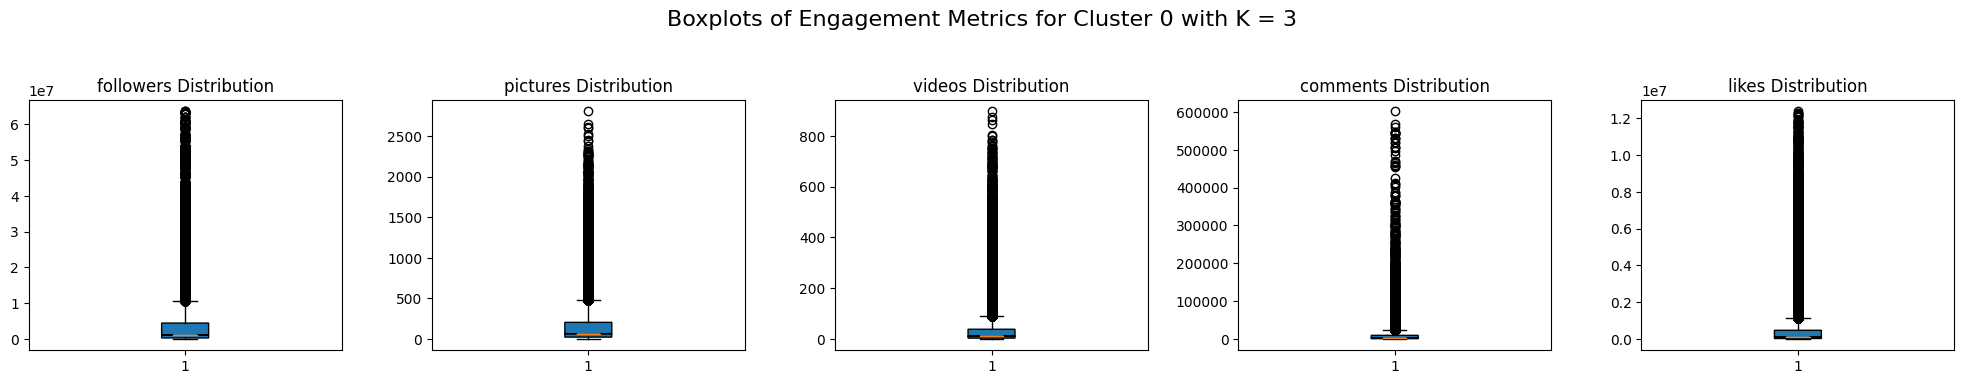

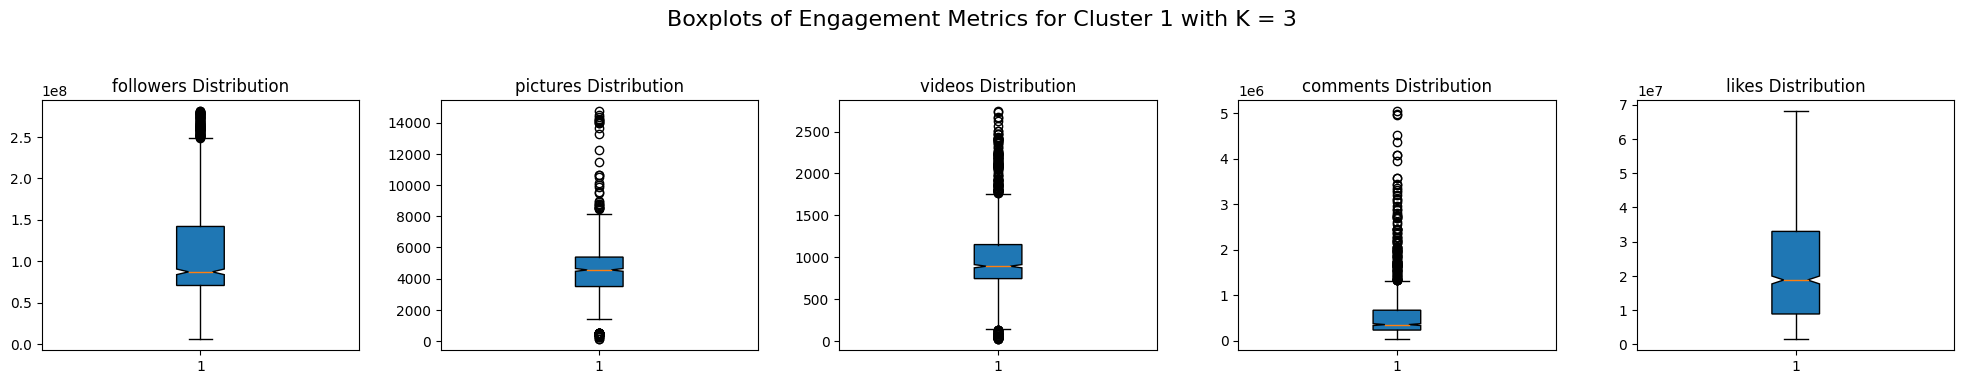

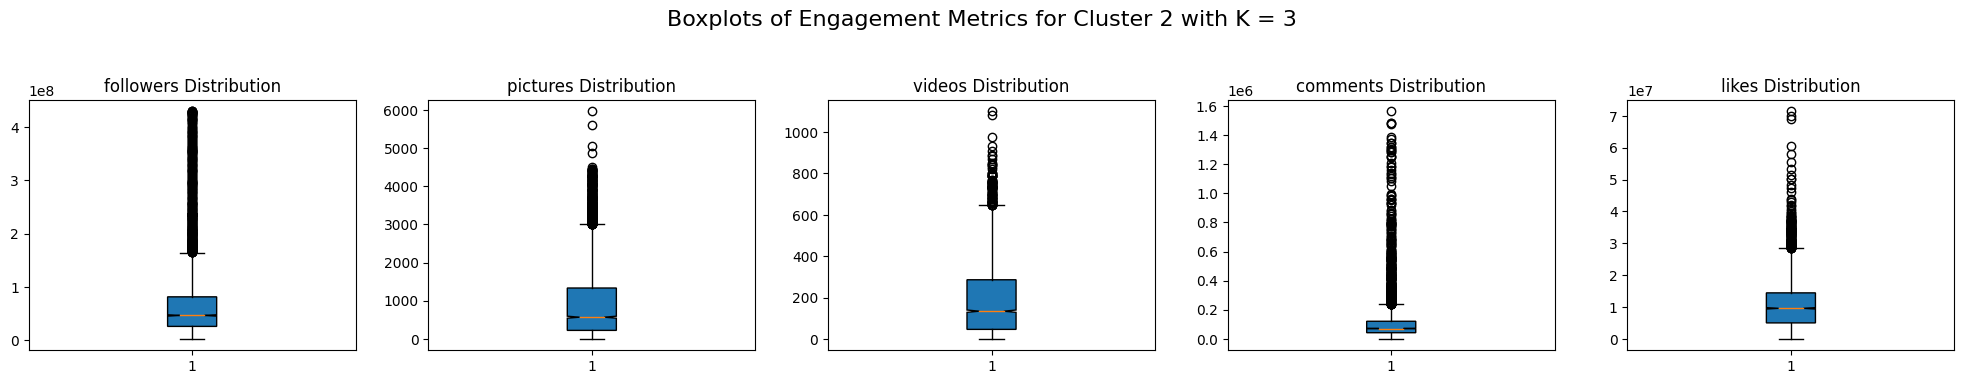

/Users/alain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


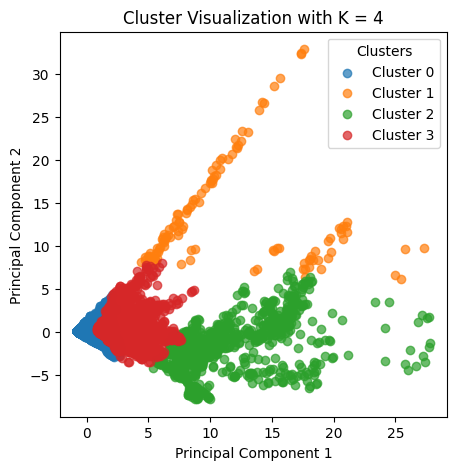

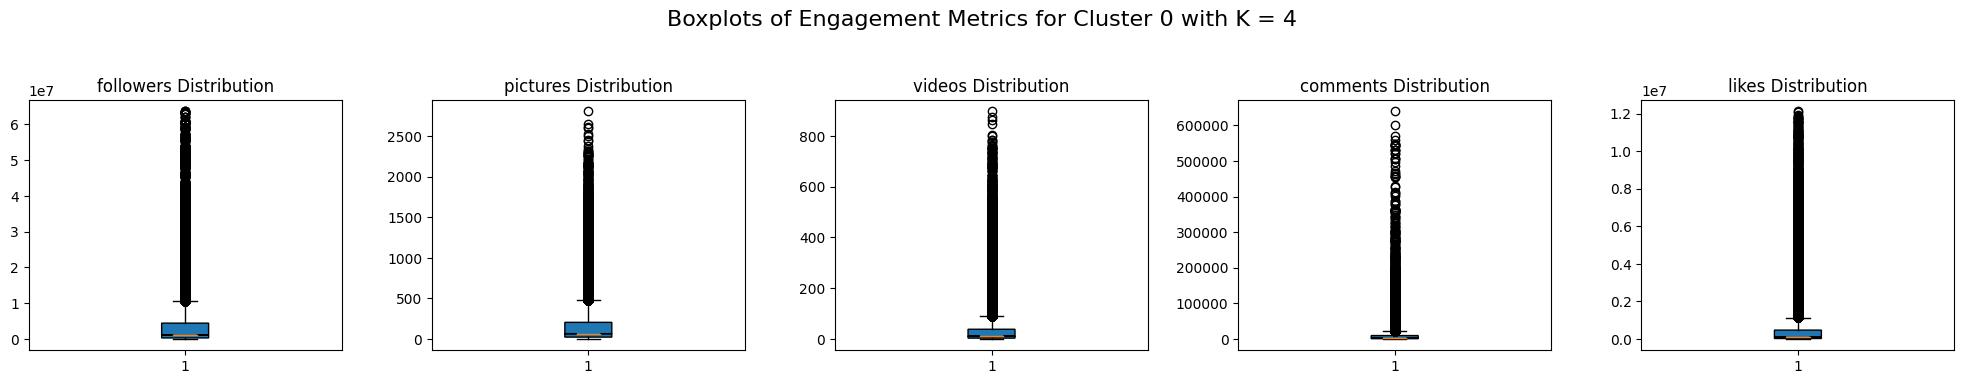

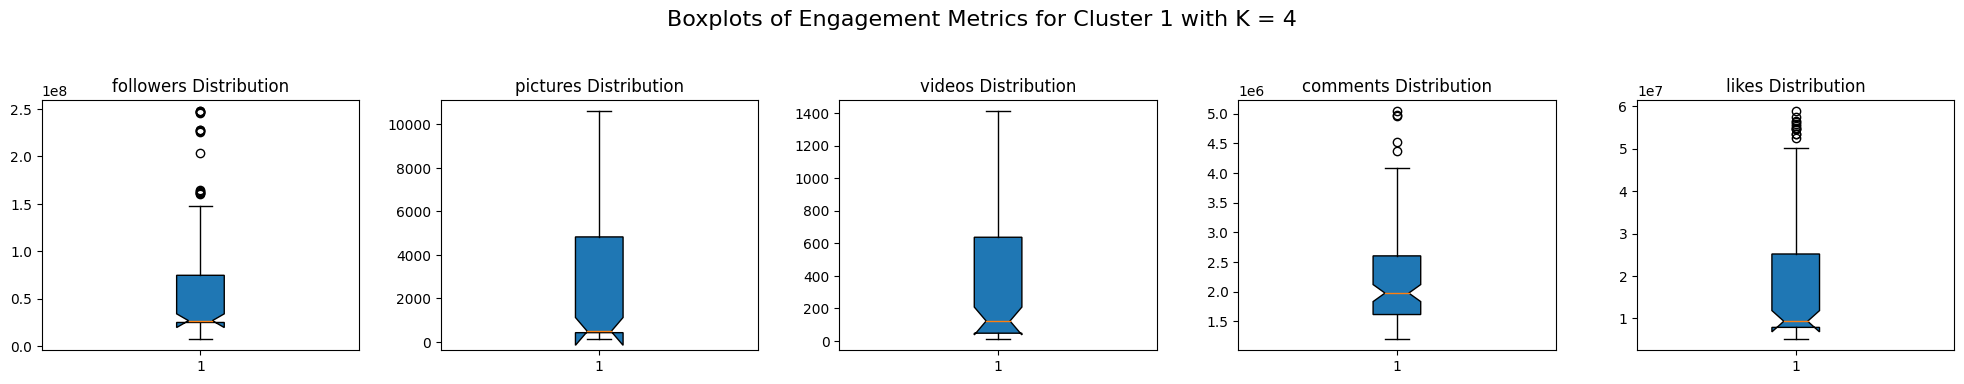

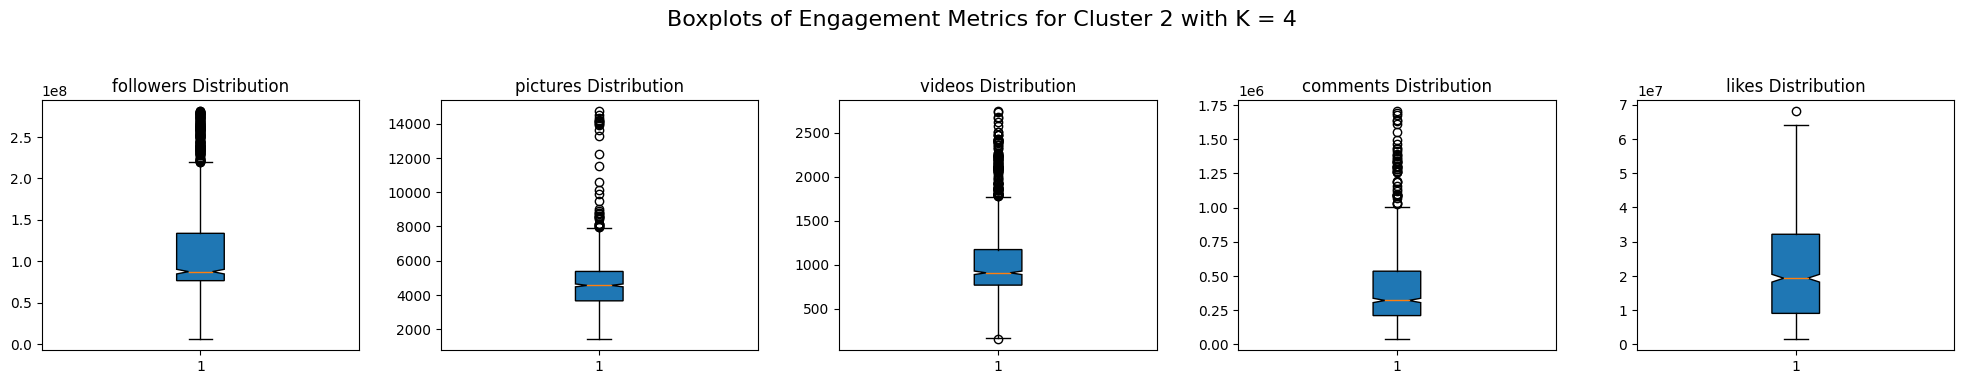

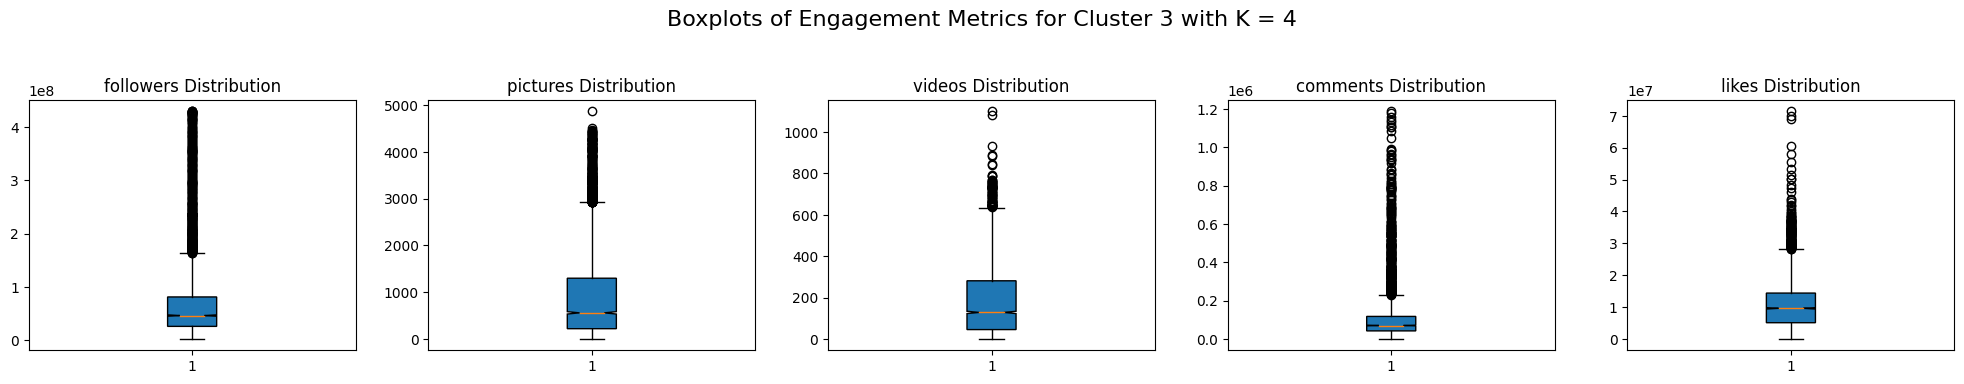

In [63]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data and perform clustering
for K in range(2, 5):  # Example range, adjust as needed
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_scaled)
    
    # Dynamic cluster column name
    cluster_column = f'cluster_{K}'
    df[cluster_column] = kmeans.labels_

    # PCA for dimension reduction (for visualization)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)

    # Assuming plot_clusters is a function that visualizes clusters
    plot_clusters(principal_components, df[cluster_column], K, f'Cluster Visualization with K = {K}')
    
    # Call the boxplot function with the correct cluster column name
    plot_cluster_boxplots(df, cluster_column, K)
